## Import the Necessary Libraries :

In [1]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier, AdaBoostClassifier
from xgboost import XGBClassifier
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.metrics import r2_score, mean_squared_error
import matplotlib.pyplot as plt

In [2]:
# Load the dataset
loan_data = pd.read_csv('loan_data.csv')
loan_data

,person_age,person_gender,person_education,person_income,person_emp_exp,person_home_ownership,loan_amnt,loan_intent,loan_int_rate,loan_percent_income,cb_person_cred_hist_length,credit_score,previous_loan_defaults_on_file,loan_status
0,22.0,female,Master,71948.0,0,RENT,35000.0,PERSONAL,16.02,0.49,3.0,561,No,1
1,21.0,female,High School,12282.0,0,OWN,1000.0,EDUCATION,11.14,0.08,2.0,504,Yes,0
2,25.0,female,High School,12438.0,3,MORTGAGE,5500.0,MEDICAL,12.87,0.44,3.0,635,No,1
3,23.0,female,Bachelor,79753.0,0,RENT,35000.0,MEDICAL,15.23,0.44,2.0,675,No,1
4,24.0,male,Master,66135.0,1,RENT,35000.0,MEDICAL,14.27,0.53,4.0,586,No,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
44995,27.0,male,Associate,47971.0,6,RENT,15000.0,MEDICAL,15.66,0.31,3.0,645,No,1
44996,37.0,female,Associate,65800.0,17,RENT,9000.0,HOMEIMPROVEMENT,14.07,0.14,11.0,621,No,1
44997,33.0,male,Associate,56942.0,7,RENT,2771.0,DEBTCONSOLIDATION,10.02,0.05,10.0,668,No,1
44998,29.0,male,Bachelor,33164.0,4,RENT,12000.0,EDUCATION,13.23,0.36,6.0,604,No,1


In [3]:
loan_data.keys()

Index(['person_age', 'person_gender', 'person_education', 'person_income',
       'person_emp_exp', 'person_home_ownership', 'loan_amnt', 'loan_intent',
       'loan_int_rate', 'loan_percent_income', 'cb_person_cred_hist_length',
       'credit_score', 'previous_loan_defaults_on_file', 'loan_status'],
      dtype='object')

In [4]:
loan_data.shape

(45000, 14)

In [5]:
loan_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45000 entries, 0 to 44999
Data columns (total 14 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   person_age                      45000 non-null  float64
 1   person_gender                   45000 non-null  object 
 2   person_education                45000 non-null  object 
 3   person_income                   45000 non-null  float64
 4   person_emp_exp                  45000 non-null  int64  
 5   person_home_ownership           45000 non-null  object 
 6   loan_amnt                       45000 non-null  float64
 7   loan_intent                     45000 non-null  object 
 8   loan_int_rate                   45000 non-null  float64
 9   loan_percent_income             45000 non-null  float64
 10  cb_person_cred_hist_length      45000 non-null  float64
 11  credit_score                    45000 non-null  int64  
 12  previous_loan_defaults_on_file  

In [6]:
def binary_map(value):
    return {'Yes': 1, 'No': 0}.get(value, None)

In [7]:
# Convert of value from (Yes & No) to (1 & 0)
loan_data['previous_loan_defaults_on_file'] = loan_data['previous_loan_defaults_on_file'].apply(binary_map)

In [8]:
loan_data.previous_loan_defaults_on_file

0        0
1        1
2        0
3        0
4        0
        ..
44995    0
44996    0
44997    0
44998    0
44999    0
Name: previous_loan_defaults_on_file, Length: 45000, dtype: int64

In [9]:
loan_data.isnull().sum()

person_age                        0
person_gender                     0
person_education                  0
person_income                     0
person_emp_exp                    0
person_home_ownership             0
loan_amnt                         0
loan_intent                       0
loan_int_rate                     0
loan_percent_income               0
cb_person_cred_hist_length        0
credit_score                      0
previous_loan_defaults_on_file    0
loan_status                       0
dtype: int64

In [10]:
d = ['person_age','person_gender','person_education','person_emp_exp','person_home_ownership','loan_intent']
result = loan_data.pop('loan_status')
data = loan_data.drop(columns=d)

In [11]:
# Split the dataset into training and testing data
training_data, testing_data, training_result, testing_result = train_test_split(data, result, test_size=0.15, random_state=100)

In [23]:
# Fit on the training data and transform both training and testing data
scaler = StandardScaler()
training_data = scaler.fit_transform(training_data)
testing_data = scaler.transform(testing_data)

In [25]:
training_data

array([[ 1.20282837,  0.06538576, -0.98616958, ...,  0.55039405,
         1.51662918,  0.98258302],
       [ 0.340919  , -0.40957992,  0.7231304 , ..., -0.99582697,
        -0.88383502,  0.98258302],
       [-0.65639643, -0.2908385 , -1.37571535, ..., -0.73812347,
        -0.76480374, -1.0177257 ],
       ...,
       [ 0.19925719,  1.33196091, -1.04325818, ..., -0.99582697,
         1.00082695, -1.0177257 ],
       [ 0.48324938, -0.40957992, -0.81154561, ..., -0.73812347,
        -1.85592383,  0.98258302],
       [ 0.13899182,  1.64860469, -0.63692165, ..., -0.73812347,
        -1.717054  ,  0.98258302]])

In [27]:
testing_data

array([[-0.3187289 , -0.80538466, -1.48989256, ..., -0.73812347,
         0.54454037,  0.98258302],
       [-0.51737301,  0.82533085,  0.04478345, ...,  0.29269054,
         1.0603426 , -1.0177257 ],
       [ 0.3108102 ,  0.06538576, -1.17422616, ..., -0.99582697,
         0.24696216,  0.98258302],
       ...,
       [ 0.12527452,  0.25537203,  1.00185711, ..., -0.48041997,
        -0.78464229,  0.98258302],
       [ 0.77193338,  1.64860469, -1.17422616, ...,  0.03498704,
        -0.01093895,  0.98258302],
       [-0.39109987, -0.72622371,  2.61377065, ...,  1.06580105,
         0.22712362, -1.0177257 ]])

## Linear Regression Model

In [30]:
# Initialize the Linear Regression model
linear_model = LinearRegression()

# Train the Linear Regression model on the training data 
linear_model.fit(training_data, training_result)

# Predict the labels for the testing data
linear_pred = linear_model.predict(testing_data)

# Calculate the R² score & Mean Squared Error (MSE) for the testing dataset
linear_r2 = r2_score(testing_result, linear_pred)
linear_mse = mean_squared_error(testing_result, linear_pred)

# Print the performance metrics of the Linear Regression model
print("R^2 Score: ", linear_r2)
print("Mean Squared Error: ", linear_mse)

R^2 Score:  0.4508818418776265
Mean Squared Error:  0.09705089921403355


## Logistic Regression Model

Accuracy of Logistic Model: 89.08%

Confusion Matrix:
 [[4889  313]
 [ 424 1124]]


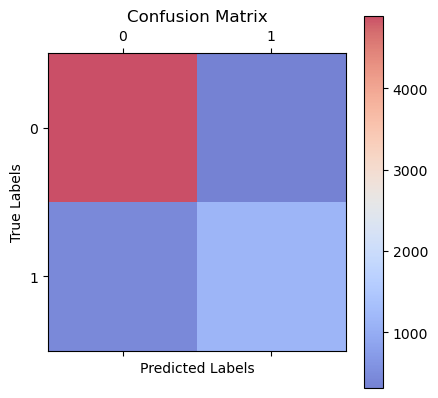

In [33]:
# Initialize and train the Logistic Regression model
logistic_model = LogisticRegression(max_iter=5000)
logistic_model.fit(training_data, training_result)

# Predicting on test data
logistic_pred = logistic_model.predict(testing_data)

# Evaluate the model
logistic_acc = accuracy_score(testing_result, logistic_pred)*100
print("Accuracy of Logistic Model: {:.2f}%".format(logistic_acc))

# Display confusion matrix
conf_mat = confusion_matrix(testing_result, logistic_pred)
print("\nConfusion Matrix:\n", conf_mat)

# Visualize Confusion Matrix
plt.matshow(conf_mat, cmap="coolwarm", alpha=0.7)
plt.title("Confusion Matrix")
plt.colorbar()
plt.ylabel("True Labels")
plt.xlabel("Predicted Labels")
plt.show()

## K Nearest Neighbours(KNN) Model

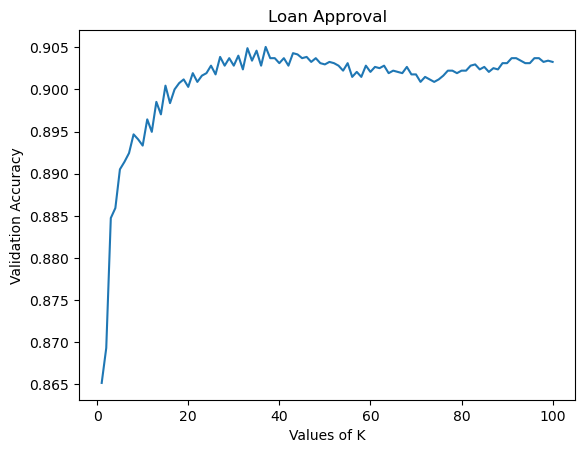

In [36]:
ks= [i for i in range(1,101)]
k_values= list()
for k in range(1,101):
  knn= KNeighborsClassifier(n_neighbors=k)
  knn.fit(training_data, training_result)
  k_values.append(knn.score(testing_data, testing_result))

# PLotting the graph
plt.plot(ks, k_values)
plt.xlabel("Values of K")
plt.ylabel("Validation Accuracy")
plt.title("Loan Approval")
plt.show()

In [37]:
# Initialize the K-Nearest Neighbors (KNN) Classifier with  neighbors
knn_model = KNeighborsClassifier(n_neighbors=27)

# Train the KNN model on the training data and labels
knn_model.fit(training_data, training_result)

# Predict the labels for the testing data
knn_pred = knn_model.predict(testing_data)

# Calculate the accuracy of the KNN model
knn_acc = accuracy_score(testing_result, knn_pred)*100   # For Classification model, we use accuracy_score instead of R^2 and MSE
print("Accuracy of KNN Model: {:.2f}%".format(knn_acc))

Accuracy of KNN Model: 90.39%


## Decision Tree Classifier Model

In [39]:
# Initialize the Decision Tree Classifier
dt_model = DecisionTreeClassifier(random_state=42, max_depth=8, min_samples_leaf=5)

# Train the model
dt_model.fit(training_data, training_result)

# Predict on the testing data
dt_pred = dt_model.predict(testing_data)

# Calculate accuracy
dt_acc = accuracy_score(testing_result, dt_pred)*100
print("Accuracy of Decision Tree Model: {:.2f}%".format(dt_acc))

Accuracy of Decision Tree Model: 91.02%


## Random Forest

In [41]:
# Initialize and train the Random Forest model
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(training_data, training_result)

# Make predictions
rf_pred = rf_model.predict(testing_data)

# Evaluate the model
rf_acc = accuracy_score(testing_result, rf_pred)*100
print("Accuracy of Logistic Regression Model: {:.2f}%".format(rf_acc))

Accuracy of Logistic Regression Model: 91.45%


## Adaboost Classifier

In [43]:
# Initialize and train the Adaboost Classifier model
adb_model = AdaBoostClassifier(n_estimators=100, learning_rate=0.1, random_state=42)
adb_model.fit(training_data, training_result)

# Make predictions
adb_pred = adb_model.predict(testing_data)

# Calculate accuracy
adb_acc = accuracy_score(testing_result, adb_pred)*100
print("Accuracy of Adaboost Model: {:.2f}%".format(adb_acc))

C:\Anaconda\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


Accuracy of Adaboost Model: 90.99%


## Gradient Boosting Classifier

In [45]:
# Initialize and train the Gradient Boosting Classisfier model
gb_model = GradientBoostingClassifier(n_estimators=100, learning_rate=0.1, max_depth=10, random_state=42)
gb_model.fit(training_data, training_result)

# Make predictions
gb_pred = gb_model.predict(testing_data)

# Calculate accuracy
gb_acc = accuracy_score(testing_result, gb_pred)*100
print("Accuracy of Gradient Boosting Model: {:.2f}%".format(gb_acc))

Accuracy of Gradient Boosting Model: 92.16%


## XGBoost Classifier

In [47]:
# Initialize and train the XGBoost Classifier model
xgb_model = XGBClassifier(n_estimators=100, learning_rate=0.1, max_depth=10, random_state=42)
xgb_model.fit(training_data, training_result)

# Make predictions
xgb_pred = xgb_model.predict(testing_data)

# Calculate accuracy
xgb_acc = accuracy_score(testing_result, xgb_pred)*100
print("Accuracy of Gradient Boosting Model: {:.2f}%".format(xgb_acc))

Accuracy of Gradient Boosting Model: 91.90%


## Support Vector Machine (SVM) Classifier Model

In [49]:
# Initialize and train the SVM Classifier model
svm_model = SVC(kernel='rbf', C=1.0, gamma='scale', random_state=42)
svm_model.fit(training_data, training_result)

# Make predictions
svm_pred = svm_model.predict(testing_data)

# Calculate accuracy
svm_acc = accuracy_score(testing_result, svm_pred)*100
print("Accuracy of Support Vector Machine Model: {:.2f}%".format(svm_acc))

Accuracy of Support Vector Machine Model: 90.30%


## Representation of Accuracy of model

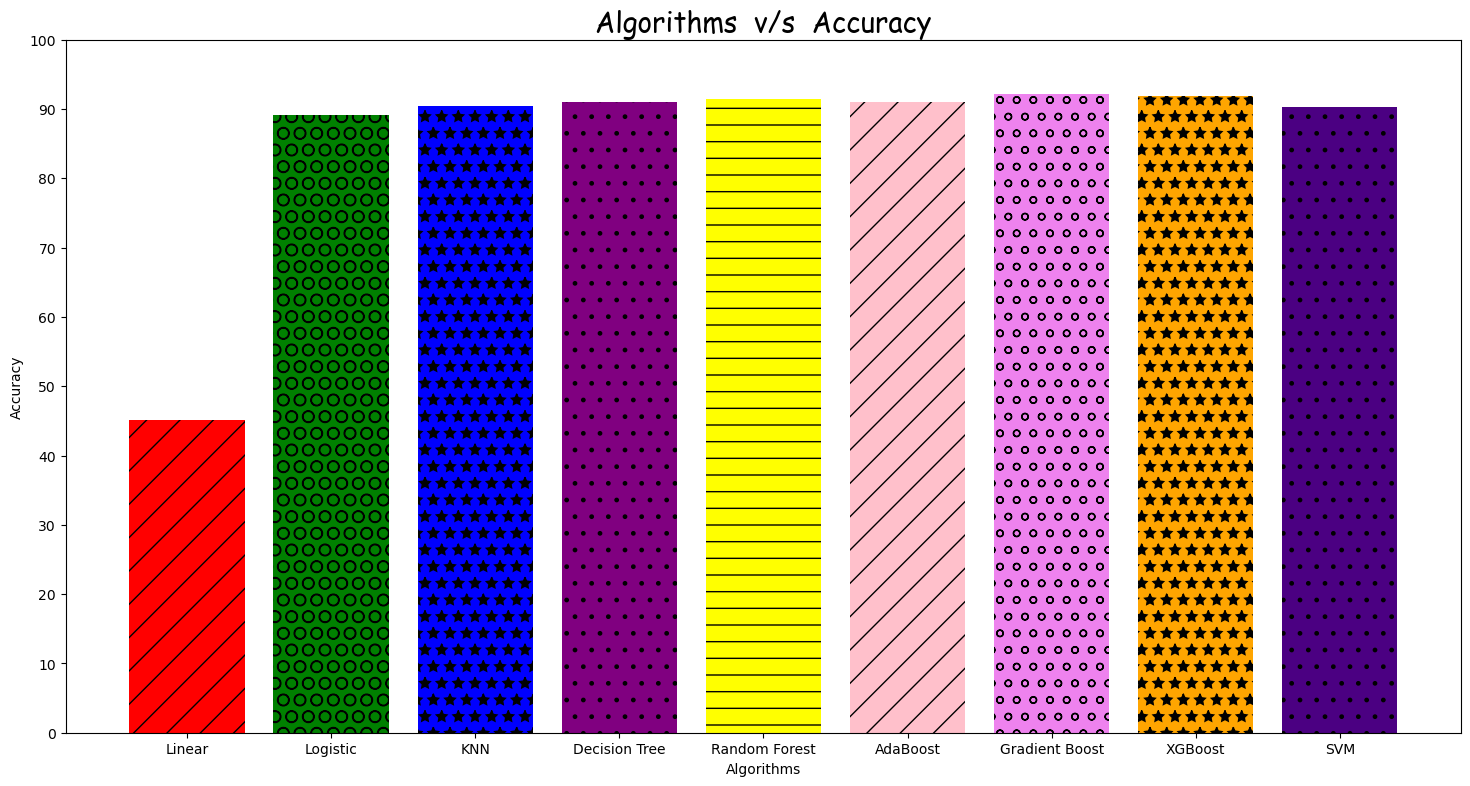

In [51]:
algorithms = ['Linear', 'Logistic', 'KNN', 'Decision Tree', 'Random Forest', 'AdaBoost', 'Gradient Boost', 'XGBoost', 'SVM']
accuracy = [linear_r2*100, logistic_acc, knn_acc, dt_acc, rf_acc, adb_acc, gb_acc, xgb_acc, svm_acc]

plt.figure(figsize=(18,9))

bars = plt.bar(algorithms, accuracy, color=["red", "green", "blue", "purple", "yellow", "pink", "violet", "orange", "indigo"])
patterns = ['/', 'O', '*', '.', '-', '/', 'o', '*', '.']
for bar in bars:
    bar.set_hatch(patterns.pop(0))
    
plt.title("Algorithms  v/s  Accuracy", fontdict={'fontname': 'Comic Sans MS', 'fontsize': 20})
plt.xlabel("Algorithms")
plt.ylabel("Accuracy")
plt.yticks([0,10,20,30,40,50,60,70,80,90,100])
plt.show()